In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
df = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#Finding if there is any null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
#Importing some neccesary libraries for Visualization
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<function matplotlib.pyplot.show(close=None, block=None)>

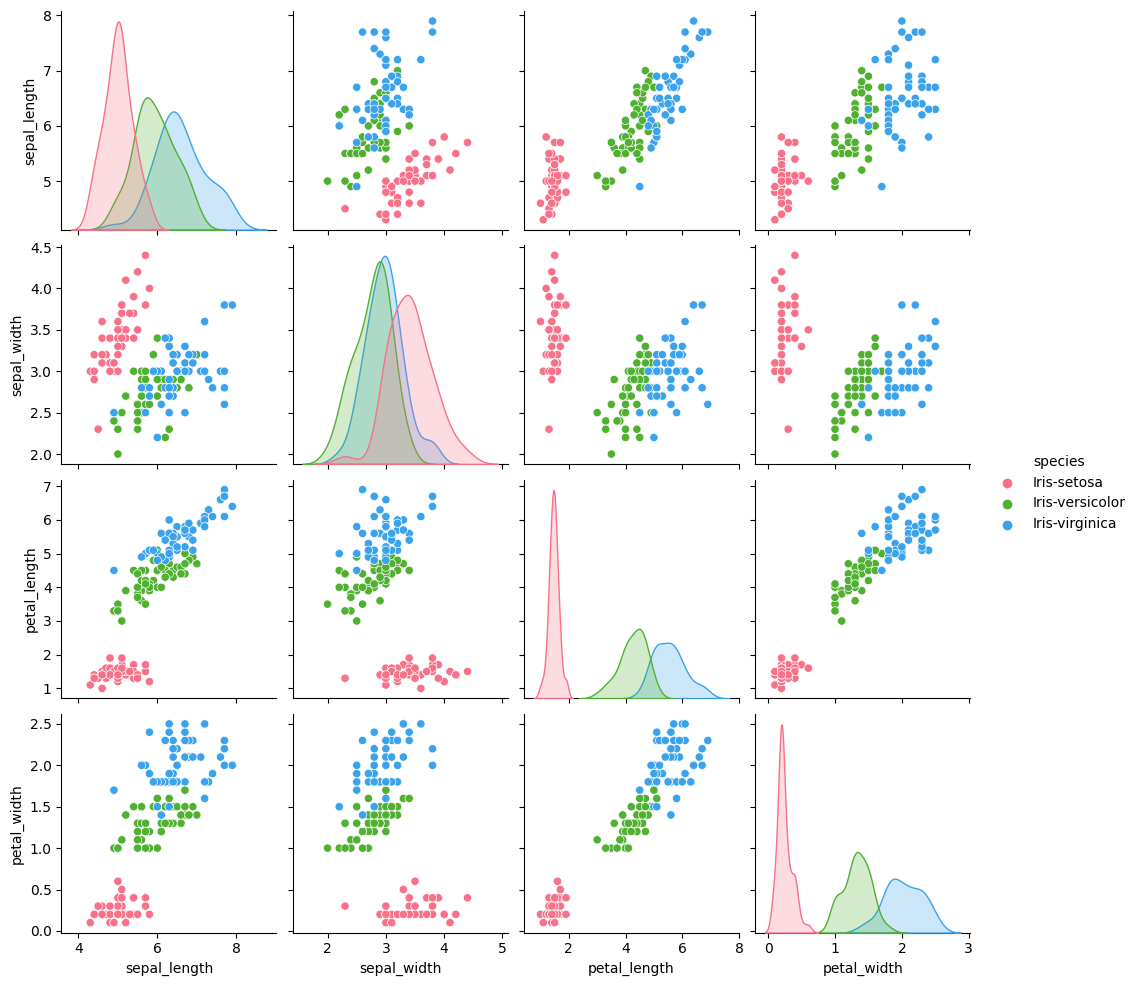

In [7]:
#Pairplot
sns.pairplot(df,hue = 'species',palette="husl")
plt.show

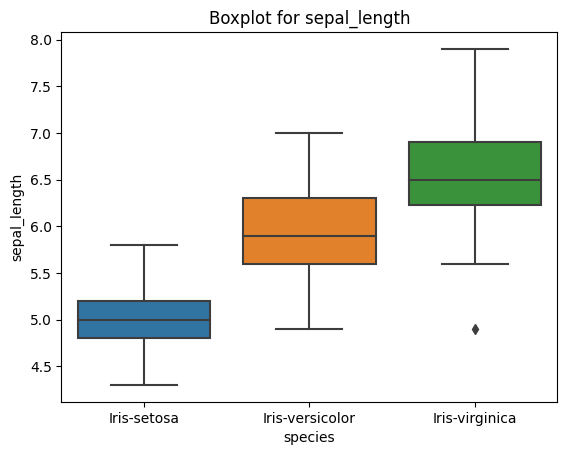

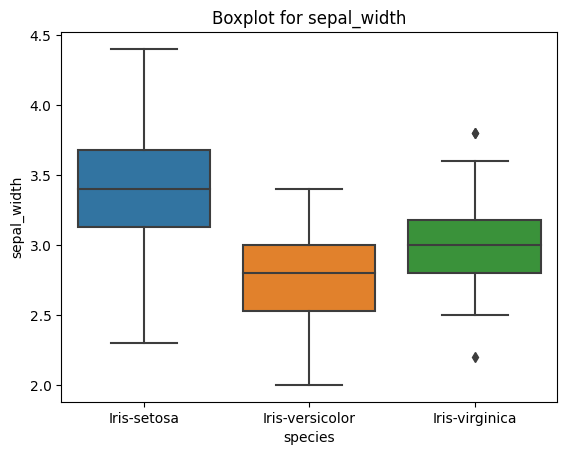

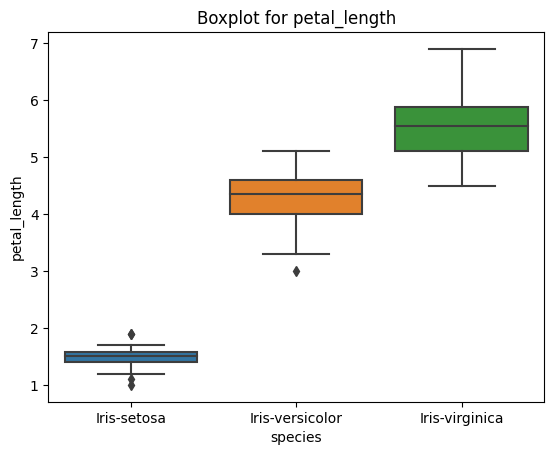

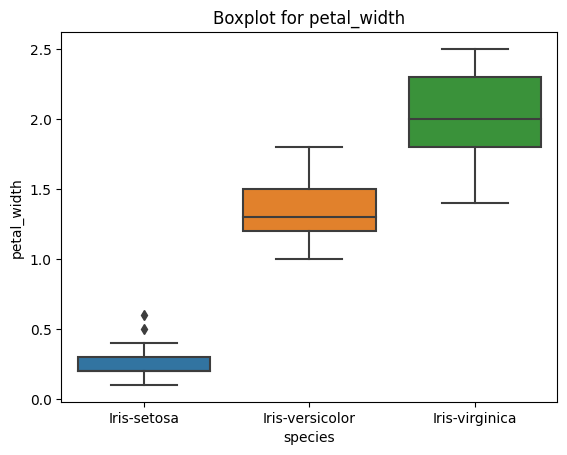

In [8]:
# Box plot
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for feature in features:
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Boxplot for {feature}')
    plt.show()

As we can see that we got some outliers according to above box plot we can detect and remove outliers by using Z-Score method

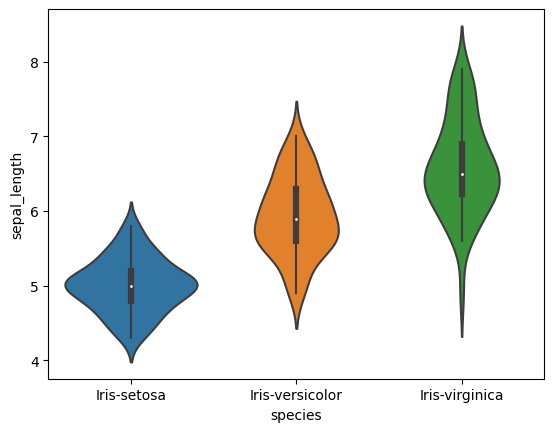

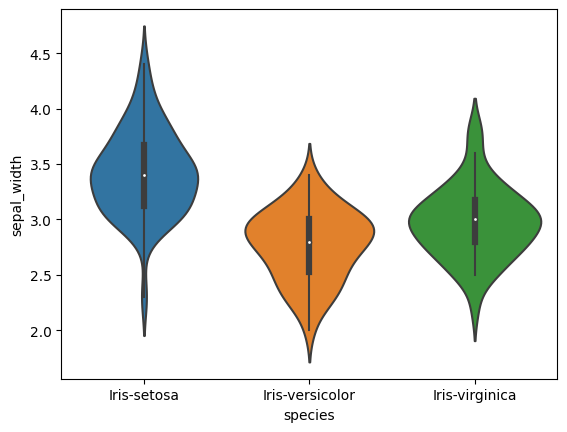

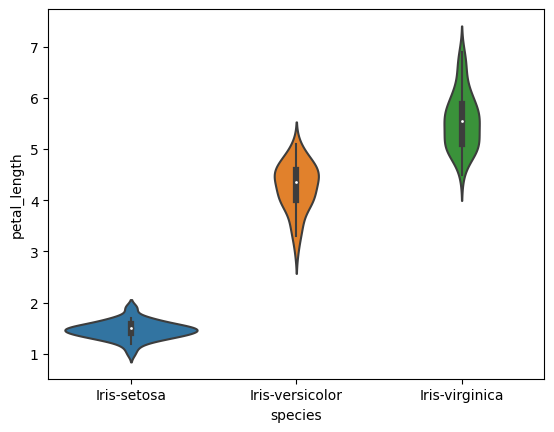

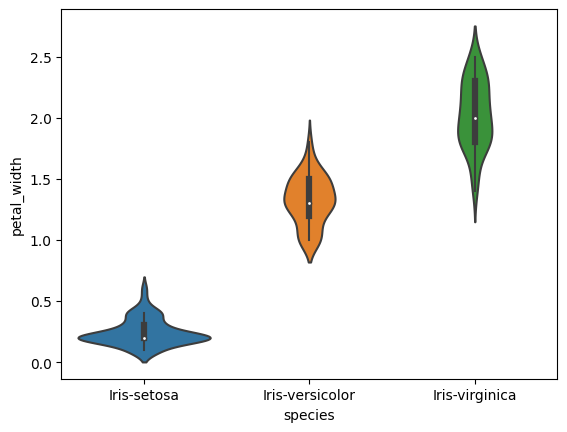

In [9]:
#Bivariate Violin plot Analysis
for feature in features:
    sns.violinplot(x='species', y=feature, data=df)
    plt.show()

<Axes: title={'center': 'Correlation Matrix for Iris Dataset'}>

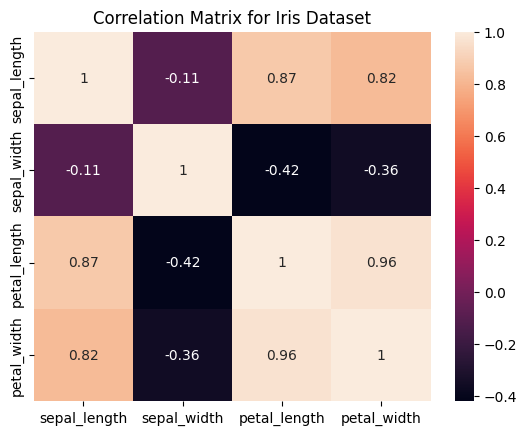

In [10]:
#Correlation matrix
correl = df.drop(['species'], axis=1).corr()
plt.title('Correlation Matrix for Iris Dataset')
sns.heatmap(correl, annot=True)

In [11]:
#Spliting the dataset into features and target variables
X = df.drop('species', axis=1)
y = df['species']

In [12]:
#Split the data into training and testing part
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#Feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
#Train logistic Regression MOdel
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [15]:
#Evaluate and Print results of Logistic regression model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
logistic_y_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
logistic_confusion_mat = confusion_matrix(y_test, logistic_y_pred)
logistic_classification_rep = classification_report(y_test, logistic_y_pred)
print("Logistic Regression Results:")
print(f'Accuracy: {logistic_accuracy}')
print(f'Confusion Matrix:\n{logistic_confusion_mat}')
print(f'Classification Report:\n{logistic_classification_rep}')

Logistic Regression Results:
Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [16]:
#Train SVM Model
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [17]:
#Evaluate and Print Results of SVM
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_confusion_mat = confusion_matrix(y_test, svm_y_pred)
svm_classification_rep = classification_report(y_test, svm_y_pred)
print("\nSVM Results:")
print(f'Accuracy: {svm_accuracy}')
print(f'Confusion Matrix:\n{svm_confusion_mat}')
print(f'Classification Report:\n{svm_classification_rep}')


SVM Results:
Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [18]:
#Train Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
#Evaluate and Print results of Decision Tree
dt_y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_confusion_mat = confusion_matrix(y_test, dt_y_pred)
dt_classification_rep = classification_report(y_test, dt_y_pred)
print("\nDecision Tree Results:")
print(f'Accuracy: {dt_accuracy}')
print(f'Confusion Matrix:\n{dt_confusion_mat}')
print(f'Classification Report:\n{dt_classification_rep}')


Decision Tree Results:
Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

